# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [75]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import os

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [76]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
cities

Number of cities in the list: 589


['pisco',
 'coedpoeth',
 'crane',
 'freetown',
 'albany',
 'demyansk',
 'bredasdorp',
 'ushuaia',
 'bethel',
 'ilulissat',
 'margaret river',
 'port-aux-francais',
 'adamstown',
 'invercargill',
 'klyuchi',
 'boguchany',
 'ola',
 'tura',
 'mount isa',
 'chonchi',
 'bam',
 'port mathurin',
 'glace bay',
 'grytviken',
 'waitangi',
 'ribeira grande',
 'luderitz',
 'aquidauana',
 'saipan',
 'laguna',
 'papao',
 'globe',
 'saint-pierre',
 'hadibu',
 'brokopondo',
 'olonkinbyen',
 'amboanjo',
 'thompson',
 'hithadhoo',
 'vadso',
 'puerto san carlos',
 'sucua',
 'tabas',
 'yellowknife',
 'hammerfest',
 'iqaluit',
 'coari',
 'castillos',
 'papatowai',
 'jamestown',
 'susuman',
 'colchani',
 'taro',
 'rosario do sul',
 'kailua-kona',
 'sandnessjoen',
 'badger',
 'puerto natales',
 'northam',
 'merignac',
 'fort bragg',
 'touros',
 'porto novo',
 'edinburgh of the seven seas',
 'ingenio la esperanza',
 'ahiri',
 'tsiombe',
 'balsas',
 'vorgashor',
 'alice springs',
 'san patricio',
 'chadan',
 '

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [77]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval.....")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    query_url = f"{base_url}q={city}&units=metric&appid={weather_api_key}"    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = (requests.get(query_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval.....
-----------------------------
Processing Record 1 of Set 1 | pisco
Processing Record 2 of Set 1 | coedpoeth
Processing Record 3 of Set 1 | crane
Processing Record 4 of Set 1 | freetown
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | demyansk
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | ilulissat
Processing Record 11 of Set 1 | margaret river
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | invercargill
Processing Record 15 of Set 1 | klyuchi
Processing Record 16 of Set 1 | boguchany
Processing Record 17 of Set 1 | ola
Processing Record 18 of Set 1 | tura
Processing Record 19 of Set 1 | mount isa
Processing Record 20 of Set 1 | chonchi
Processing Record 21 of Set 1 | bam
Processing Record 22 of Set 1 | port mathurin
Processing Record 23 of Set 1 | glace bay
P

In [78]:
query_url

'http://api.openweathermap.org/data/2.5/weather?q=visby&units=metric&appid=7b4e69a88ba3157b9734618b2af9261d'

In [79]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [80]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pisco,-13.7000,-76.2167,19.03,72,20,4.63,PE,1718819412
1,coedpoeth,53.0539,-3.0623,18.94,70,40,5.66,GB,1718819412
2,crane,31.3974,-102.3501,30.56,44,15,9.51,US,1718819412
3,freetown,8.4840,-13.2299,29.84,70,75,5.66,SL,1718819412
4,albany,42.6001,-73.9662,35.02,62,95,0.45,US,1718819276


In [81]:
# Export the City_Data into a csv
cities_data_path = os.path.join("..", "output_data", "cities.csv")
city_data_df.to_csv(cities_data_path, index_label="City_ID")

In [82]:
# Read saved data
city_data_df = pd.read_csv(cities_data_path, index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pisco,-13.7000,-76.2167,19.03,72,20,4.63,PE,1718819412
1,coedpoeth,53.0539,-3.0623,18.94,70,40,5.66,GB,1718819412
2,crane,31.3974,-102.3501,30.56,44,15,9.51,US,1718819412
3,freetown,8.4840,-13.2299,29.84,70,75,5.66,SL,1718819412
4,albany,42.6001,-73.9662,35.02,62,95,0.45,US,1718819276


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

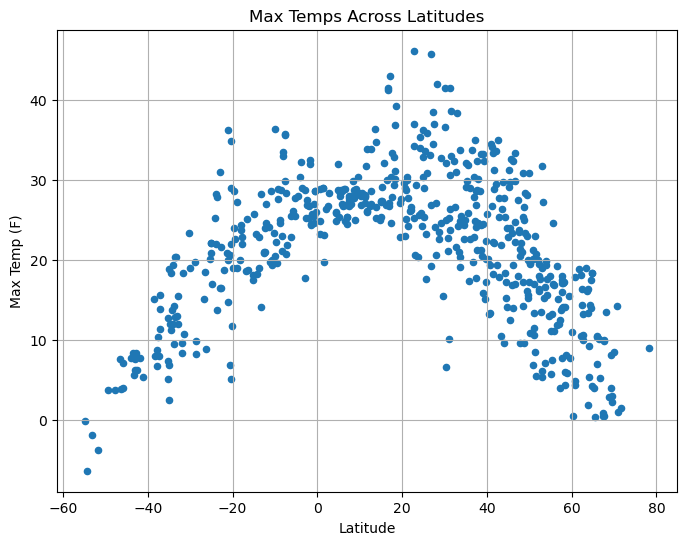

In [83]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(8,6),
              title="Max Temps Across Latitudes")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

# Save the figure
plt.savefig("../output_data/Max_Temps_Lats.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

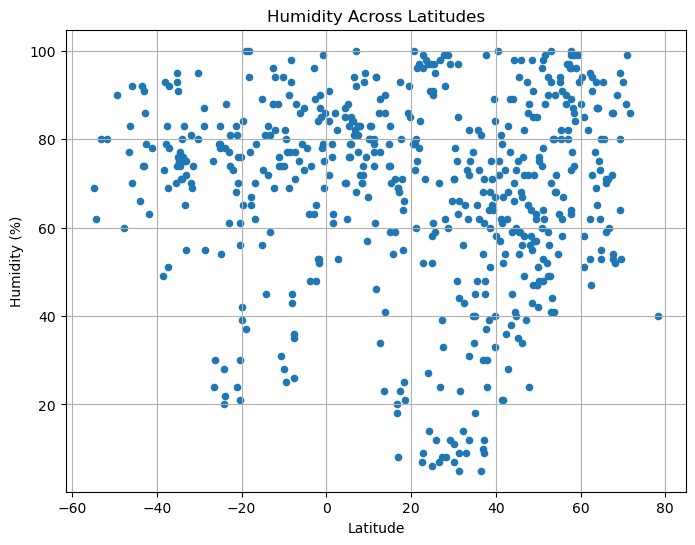

In [84]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(8,6),
              title="Humidity Across Latitudes")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("../output_data/Humidity_Lats.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

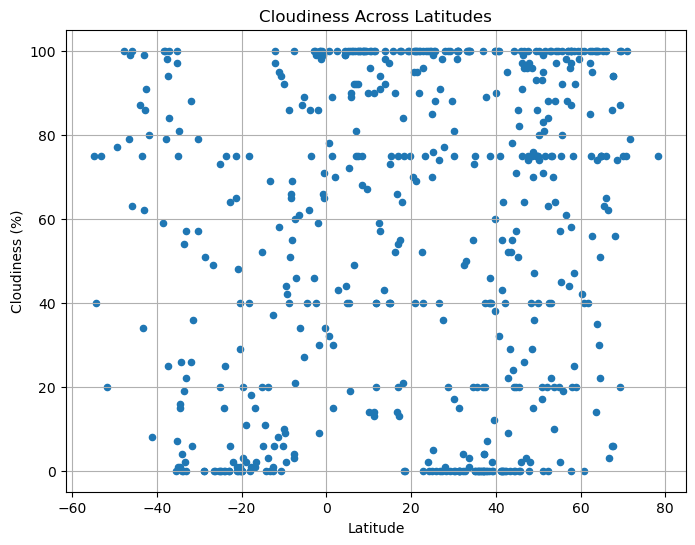

In [85]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(8,6),
              title="Cloudiness Across Latitudes")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("../output_data/Cloudiness_Lats.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

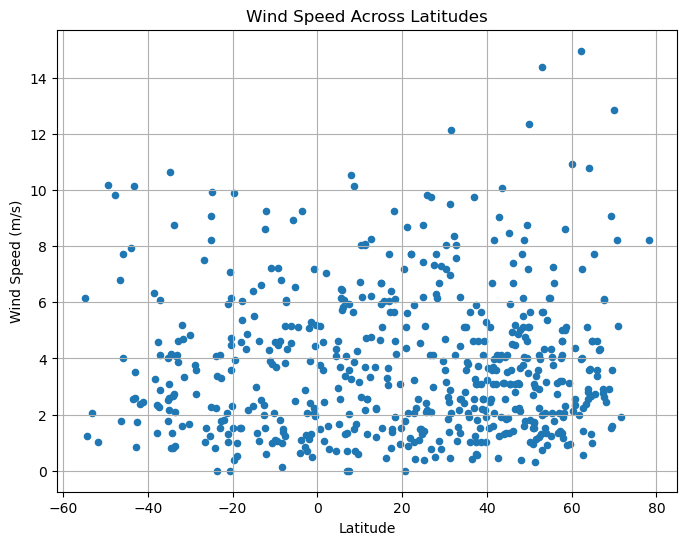

In [86]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(8,6),
              title="Wind Speed Across Latitudes")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("../output_data/Wind_Speed_Lats.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [87]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,coedpoeth,53.0539,-3.0623,18.94,70,40,5.66,GB,1718819412
2,crane,31.3974,-102.3501,30.56,44,15,9.51,US,1718819412
3,freetown,8.4840,-13.2299,29.84,70,75,5.66,SL,1718819412
4,albany,42.6001,-73.9662,35.02,62,95,0.45,US,1718819276
5,demyansk,57.6430,32.4660,18.03,96,100,5.02,RU,1718819412


In [88]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pisco,-13.7000,-76.2167,19.03,72,20,4.63,PE,1718819412
6,bredasdorp,-34.5322,20.0403,11.28,77,15,0.82,ZA,1718819412
7,ushuaia,-54.8000,-68.3000,-0.19,69,75,6.17,AR,1718819392
10,margaret river,-33.9500,115.0667,9.49,80,0,2.74,AU,1718819413
11,port-aux-francais,-49.3500,70.2167,3.68,90,77,10.20,TF,1718819413


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.46


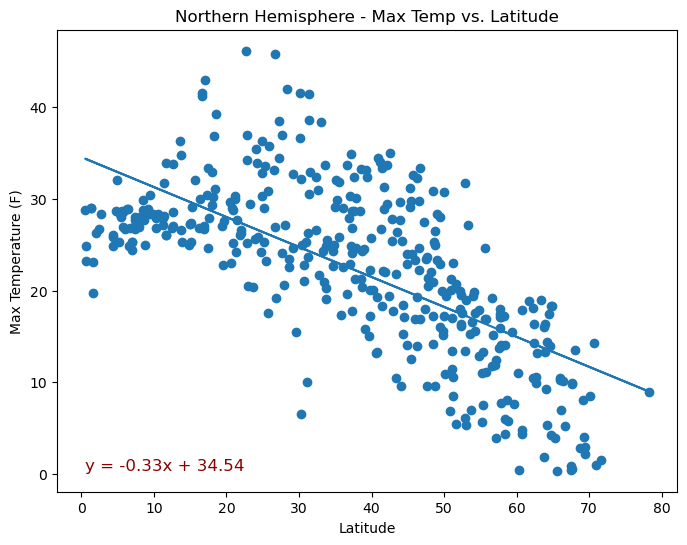

In [97]:
# Linear regression on Northern Hemisphere
# Build scatter plot for each data type:

plt.figure(figsize=(8,6))

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Perform a linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create scatter plot:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values)

# Set the title of the plot:
plt.title("Northern Hemisphere - Max Temp vs. Latitude")

# Incorporate the other graph properties:
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.text(x_values.min(), y_values.min(), line_eq, fontsize=12, color='darkred')

# Print r-squared value:
print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('../output_data/Max_Temp_Lats_North.png')

# Show plot:
plt.show()

The r-squared is: 0.68


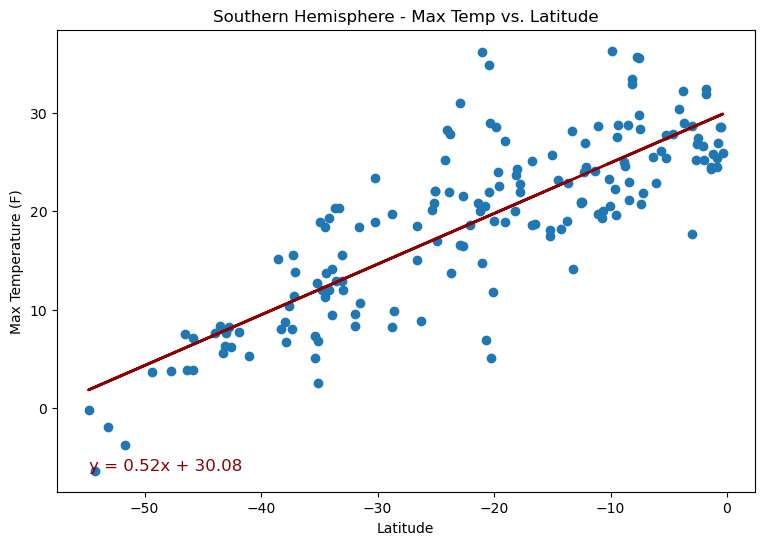

In [90]:
# Linear regression on Southern Hemisphere

plt.figure(figsize=(9,6))

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Perform a linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create scatter plot:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='darkred', linewidth=2)

# Set the title of the plot:
plt.title("Southern Hemisphere - Max Temp vs. Latitude")

# Incorporate the other graph properties:
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.text(x_values.min(), y_values.min(), line_eq, fontsize=12, color='darkred')

# Print r-squared value:
print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('../output_data/Max_Temp_Lats_South.png')

# Show plot:
plt.show()

**Discussion about the linear relationship:** Both plots indicate temperatures recorded are higher near 0 Latitude, also known as the Equator.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0


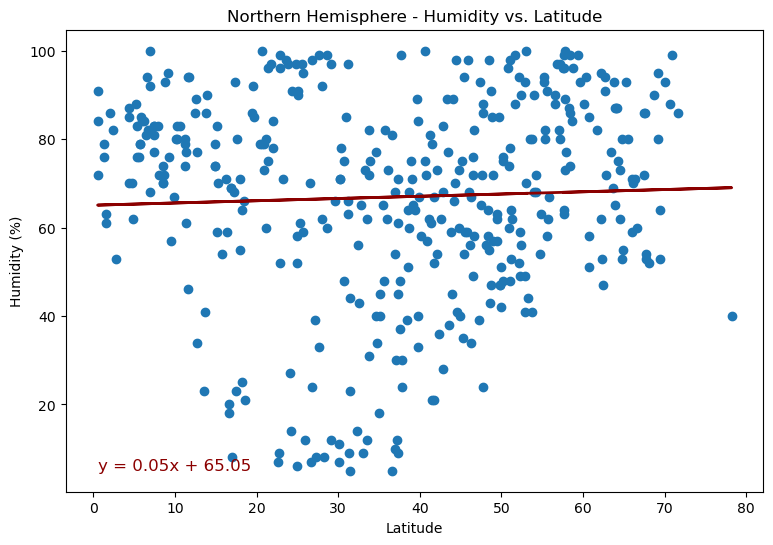

In [91]:
# Northern Hemisphere

plt.figure(figsize=(9,6))

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Perform a linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create scatter plot:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='darkred', linewidth=2)

# Set the title of the plot:
plt.title("Northern Hemisphere - Humidity vs. Latitude")

# Incorporate the other graph properties:
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.text(x_values.min(), y_values.min(), line_eq, fontsize=12, color='darkred')

# Print r-squared value:
print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('../output_data/Humidity_Lats_North.png')

# Show plot:
plt.show()

The r-squared is: 0.01


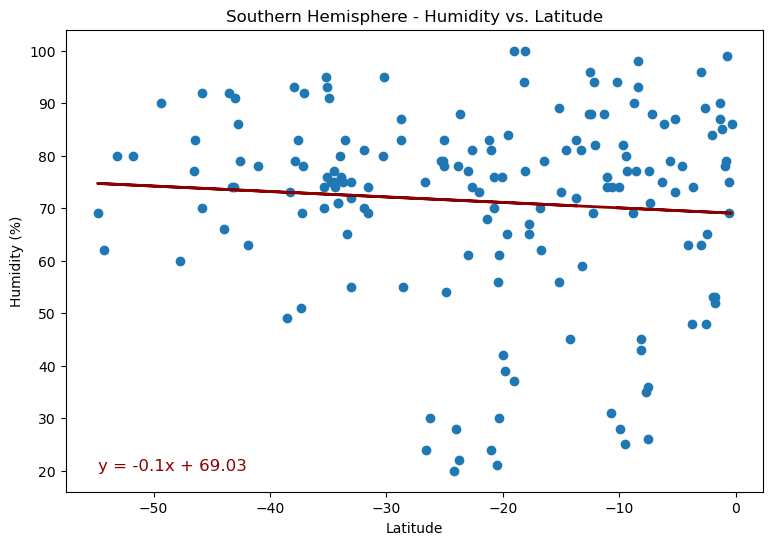

In [92]:
# Northern Hemisphere

plt.figure(figsize=(9,6))

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Perform a linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create scatter plot:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='darkred', linewidth=2)

# Set the title of the plot:
plt.title("Southern Hemisphere - Humidity vs. Latitude")

# Incorporate the other graph properties:
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.text(x_values.min(), y_values.min(), line_eq, fontsize=12, color='darkred')

# Print r-squared value:
print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('../output_data/Humidity_Lats_South.png')

# Show plot:
plt.show()

**Discussion about the linear relationship:** There does not seem to be any correlation between humidity level and latitude. Distance from the equator does not appear to impact humidity %. 



### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0


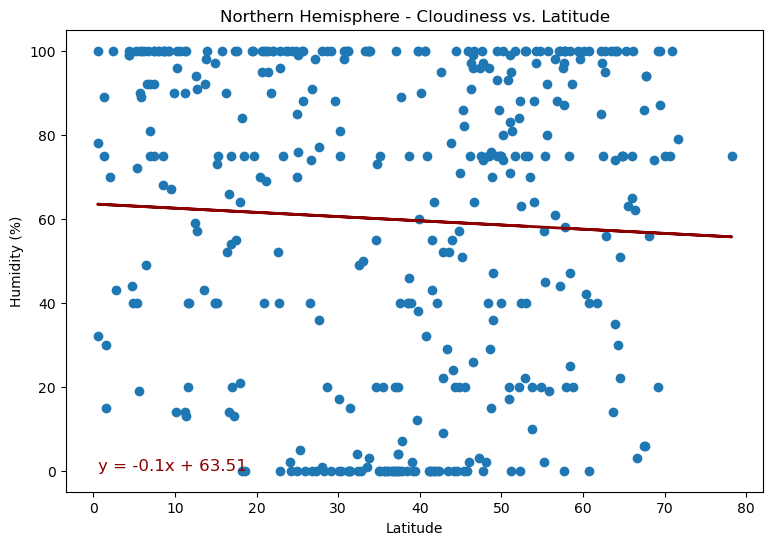

In [93]:
# Northern Hemisphere

plt.figure(figsize=(9,6))

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Perform a linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create scatter plot:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='darkred', linewidth=2)

# Set the title of the plot:
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")

# Incorporate the other graph properties:
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.text(x_values.min(), y_values.min(), line_eq, fontsize=12, color='darkred')

# Print r-squared value:
print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('../output_data/Cloudiness_Lats_North.png')

# Show plot:
plt.show()

The r-squared is: 0.01


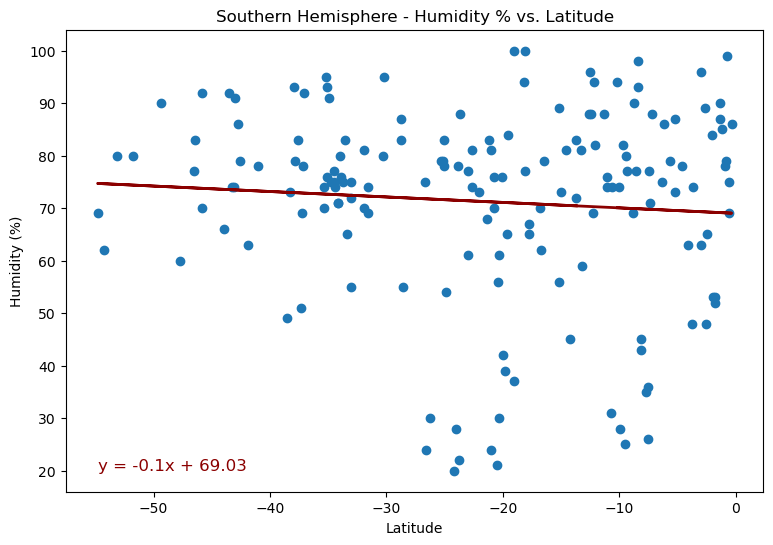

In [94]:
# Southern Hemisphere

plt.figure(figsize=(9,6))

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Perform a linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create scatter plot:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='darkred', linewidth=2)

# Set the title of the plot:
plt.title("Southern Hemisphere - Humidity % vs. Latitude")

# Incorporate the other graph properties:
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.text(x_values.min(), y_values.min(), line_eq, fontsize=12, color='darkred')

# Print r-squared value:
print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('../output_data/Cloudiness_Lats_South.png')

# Show plot:
plt.show()

**Discussion about the linear relationship:** There does not seem to be any correlation between cloudiness and latitude. Distance from the equator does not appear to impact cloudiness %. 



### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0


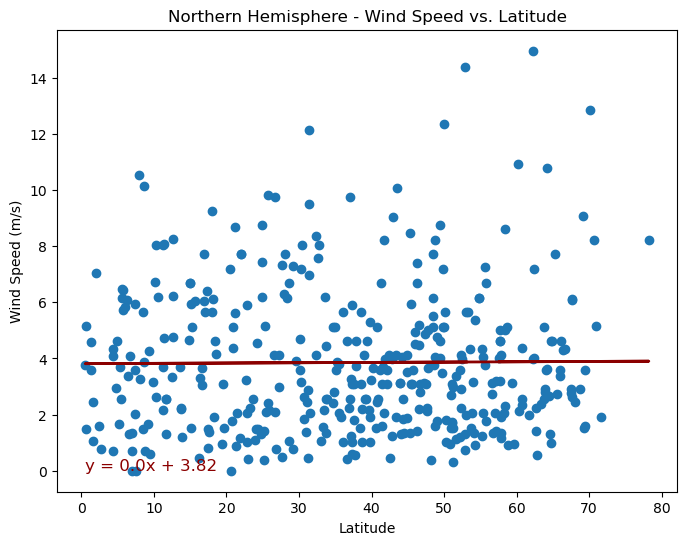

In [95]:
# Northern Hemisphere

plt.figure(figsize=(8,6))

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Perform a linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create scatter plot:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='darkred', linewidth=2)

# Set the title of the plot:
plt.title("Northern Hemisphere - Wind Speed vs. Latitude")

# Incorporate the other graph properties:
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.text(x_values.min(), y_values.min(), line_eq, fontsize=12, color='darkred')

# Print r-squared value:
print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('../output_data/Wind_Speed_Lats_North.png')

# Show plot:
plt.show()

The r-squared is: 0.01


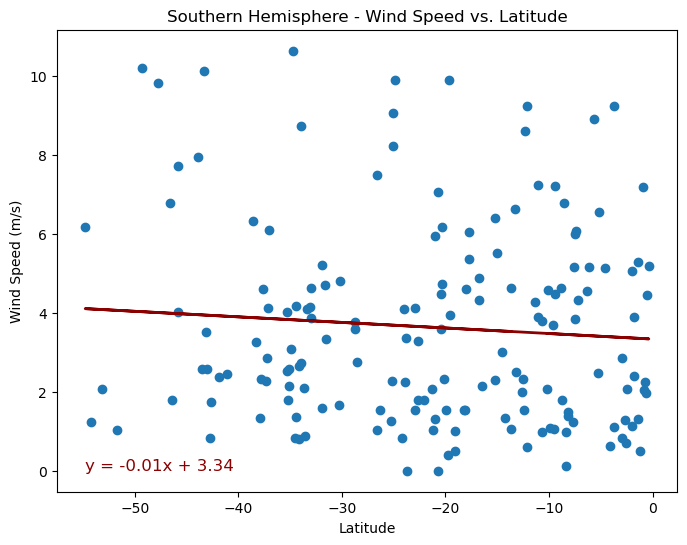

In [96]:
# Southern Hemisphere

plt.figure(figsize=(8,6))

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Perform a linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create scatter plot:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='darkred', linewidth=2)

# Set the title of the plot:
plt.title("Southern Hemisphere - Wind Speed vs. Latitude")

# Incorporate the other graph properties:
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.text(x_values.min(), y_values.min(), line_eq, fontsize=12, color='darkred')

# Print r-squared value:
print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('../output_data/Wind_Speed_Lats_South.png')

# Show plot:
plt.show()

**Discussion about the linear relationship:** There does is a small negative correlation between wind speed and latitude. Wind speed slightly increases farther south from the equator. 